In [1]:
import os
import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.stats import norm

from utils.utils import PyTree, uncertainty
from solver.ODE.special_ode_cases import get_ode_sepcial_case
from utils.plots_ode import get_std_pred

In [10]:
HOME = os.getcwd()
case = '_H'
ext_name='_train'

# train_var=[0,1]
# DNN_fu_list = [0,1]

prob_name = 'Hamiltonian'  ## option: Linear, VolterraLodka, Hamiltonian, Linhard, Rossler, Lorentz
case_no   =  0
Heteroscedastic = 0

train_var,DNN_fu_list,data_error_in, dt, train_idx, t_arr, X0 = get_ode_sepcial_case(prob_name, case_no)
    

dir = prob_name+'_C'+str(case_no)+'_D'+str(train_var)+'_N'+str(DNN_fu_list)
dir += '_heto' if Heteroscedastic else '_homo'
print('case = '+dir)
path = os.path.join(HOME, "output/ODE/"+dir)

epoch = 10000
PostPross_Data = PyTree.load(path+'/checkpoints', name='PostPross_Data'+str(epoch))
# PostPross_Data = PyTree.load(path+'/checkpoints', name='PostPross_Data_test')
state = PyTree.load(path+'/checkpoints', name='state'+str(epoch))
# data = PyTree.load(path+'/checkpoints', name='Data_40x_0.005t')
data = PostPross_Data['cdata']

case = Hamiltonian_C0_D[0, 1]_N[1, 0]_homo
loading PostPross_Data10000 parameters
Found PostPross_Data10000 parameters
loading state10000 parameters
Found state10000 parameters


In [11]:
from NN.SWAG_utils import get_SWAG_sampler

SWAG_cov_size = 5
SWAG_samples_vmap = jax.vmap(get_SWAG_sampler(num_samples=1000, debug=True), in_axes=(0, 0, 0, [0,]*SWAG_cov_size), out_axes=(0,0))

state = PyTree.load(path+'/checkpoints', name='state'+str(epoch))
subkey = jax.random.split(jax.random.PRNGKey(42), num=50)
key, SWA_flat_sample = SWAG_samples_vmap(subkey, state['params_SWA'], state['params_Sq'], state['D_hat_list'])
## no covariance
# key, SWA_flat_sample = SWAG_samples_vmap(subkey, state['params_SWA'], state['params_Sq'], [state['D_hat_list'][0]*0,]*SWAG_cov_size)

SWA_flat_sample.shape

loading state10000 parameters
Found state10000 parameters


ValueError: vmap got inconsistent sizes for array axes to be mapped:
  * most axes (7 of them) had size 10, e.g. axis 0 of argument params_SWA of type float32[10,220];
  * one axis had size 50: axis 0 of argument key of type uint32[50,2]

In [121]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', perplexity=3, random_state=42).fit_transform(SWA_flat_sample.reshape(-1,12))
X_embedded.shape

(500, 2)

([], [])

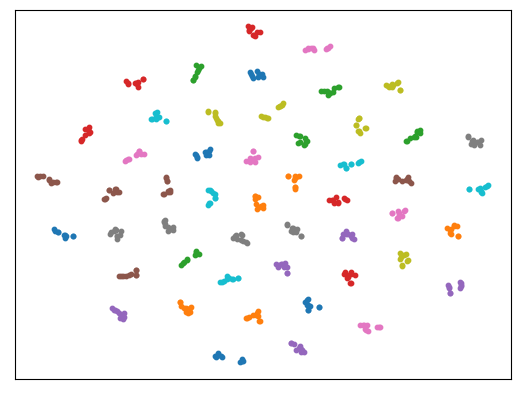

In [122]:
X_emb1 = X_embedded.reshape(50,-1,2)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], s=10)
for i in range(50):
    plt.scatter(X_emb1[i,:,0], X_emb1[i,:,1], s=10)
plt.xticks([])
plt.yticks([])

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_embedded = pca.fit_transform(SWA_flat_sample[:50].reshape(-1,12))
X_embedded.shape

(50000, 2)

([], [])

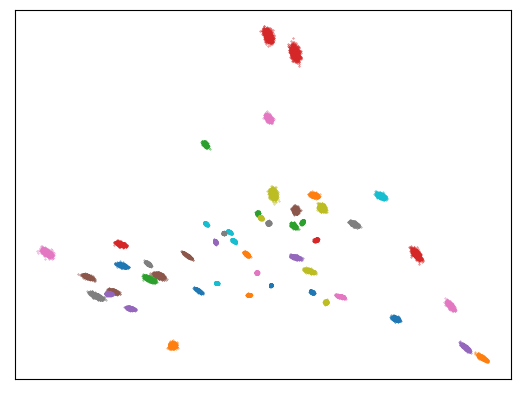

In [126]:
X_emb1 = X_embedded.reshape(50,-1,2)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
for i in range(50):
    plt.scatter(X_emb1[i,:,0], X_emb1[i,:,1], s=.1)
plt.xticks([])
plt.yticks([])

In [3]:
HMC_ = PyTree.load(path+'/checkpoints', name='HMC')
HMC_pred = HMC_['HMC_pred']
HMC_params = HMC_['HMC_params']

loading HMC parameters
Found HMC parameters


In [12]:
Grid = data['Grid']
t_arr = data['t_arr']
data_train = data['data_train']
data_test = data['data_test']
train_idx = data['train_idx']
TrainLossStore = PostPross_Data['TrainLossStore']
pred_rX = PostPross_Data['pred_rX']

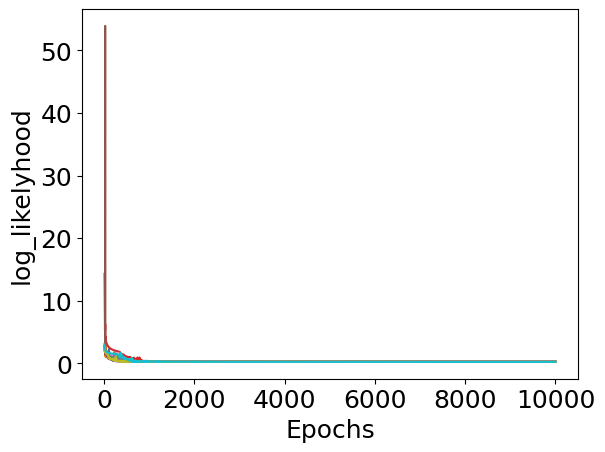

In [13]:
plt.plot(TrainLossStore[0][10:], TrainLossStore[1][10:])
plt.xlabel('Epochs')
plt.ylabel('log_likelyhood')
plt.show()

In [3]:
# fontsize = 18
# std_ord = 3
# clr ='r'

# n = pred_rX[0].shape[-1]
# plt.close('all')
# plt.rcParams['font.size'] = fontsize
# fig, ax = plt.subplots(n,3, figsize=(3*5, n*4), gridspec_kw = {'wspace':0, 'hspace':0})

# ax = get_std_pred(ax, args, data, HMC_rX , clr='b', alpha=0.15)
# ax = get_std_pred(ax, args, data, pred_rX, clr='r', alpha=0.10)

# for i in [0,1]:
#     ax[i,0].set_ylabel(r'$x_{}$'.format(i+1), size=20)
#     for j in [1,2]:
#         ax[i,j].tick_params(left = False)
#         ax[i,j].axes.yaxis.set_ticklabels([])
# for j in [0,1,2]:
#         ax[0,j].tick_params(bottom = False)
#         ax[0,j].axes.xaxis.set_ticklabels([])
#         ax[1,j].set_xlabel('t (sec)', size=20)

# ax[0,0].set_title('Aleatoric UQ', size=22)
# ax[0,1].set_title('Epistemic UQ', size=22)
# ax[0,2].set_title('Total UQ', size=22)
# fig.tight_layout()
# plt.savefig(args['path']+'/plots/'+name+'.png', dpi=300)

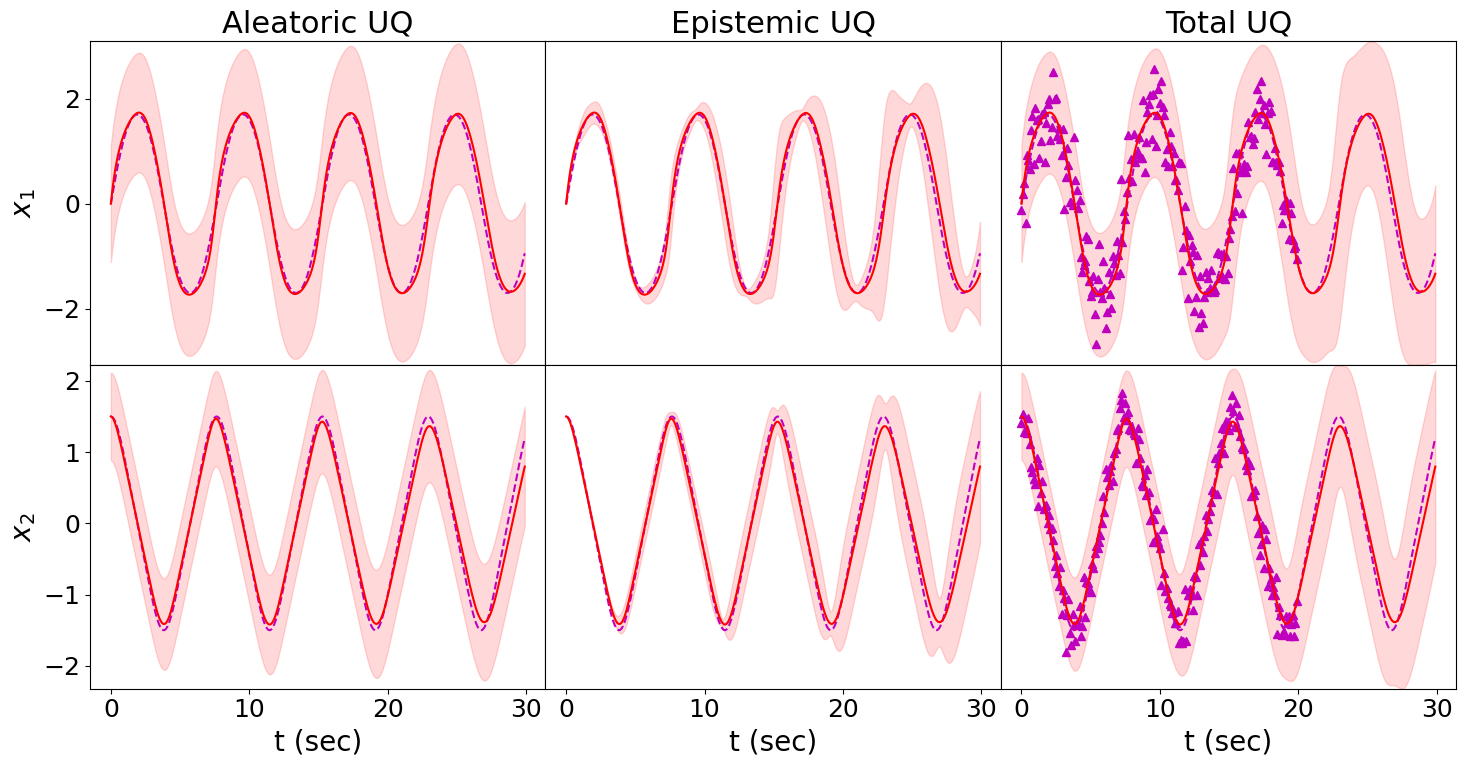

In [14]:
    
fontsize = 18
std_ord = 3
clr ='r'
alpha=.15

n = pred_rX[0].shape[-1]
plt.close('all')
plt.rcParams['font.size'] = fontsize
fig, ax = plt.subplots(n,3, figsize=(3*5, n*4), gridspec_kw = {'wspace':0, 'hspace':0})

X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX)

for i in range(n):
    if i in train_var:
        ax[i,2].plot(data['t_arr'][data['train_idx']],data['data_train'][:,i], '^m')
    for j in range(3):
        ax[i,j].plot(data['t_arr'],data['data_test'][:,i], '--m')
        ax[i,j].plot(data['t_arr'],X_mean[:,i], clr)
        # ax[i,j].set_xlabel('t')
        # ax[i,j].set_ylabel('X'+str(i))
        ax[i,j].set_ylim(jnp.min(X_mean[:,i]-std_ord*sX_tot[:,i]), jnp.max(X_mean[:,i]+std_ord*sX_tot[:,i]))
    ax[i,0].fill_between(data['t_arr'], (X_mean[:,i]-std_ord*sX_ale[:,i]), (X_mean[:,i]+std_ord*sX_ale[:,i]), color=clr, alpha=alpha)
    ax[i,1].fill_between(data['t_arr'], (X_mean[:,i]-std_ord*sX_eps[:,i]), (X_mean[:,i]+std_ord*sX_eps[:,i]), color=clr, alpha=alpha)
    ax[i,2].fill_between(data['t_arr'], (X_mean[:,i]-std_ord*sX_tot[:,i]), (X_mean[:,i]+std_ord*sX_tot[:,i]), color=clr, alpha=alpha)

for i in [0,1]:
    ax[i,0].set_ylabel(r'$x_{}$'.format(i+1), size=20)
    for j in [1,2]:
        ax[i,j].tick_params(left = False)
        ax[i,j].axes.yaxis.set_ticklabels([])
for j in [0,1,2]:
        ax[0,j].tick_params(bottom = False)
        ax[0,j].axes.xaxis.set_ticklabels([])
        ax[1,j].set_xlabel('t (sec)', size=20)

ax[0,0].set_title('Aleatoric UQ', size=22)
ax[0,1].set_title('Epistemic UQ', size=22)
ax[0,2].set_title('Total UQ', size=22)
fig.tight_layout()
plt.savefig(path+'/plots/SWAG'+ext_name+'.png', dpi=300)
# plt.show()

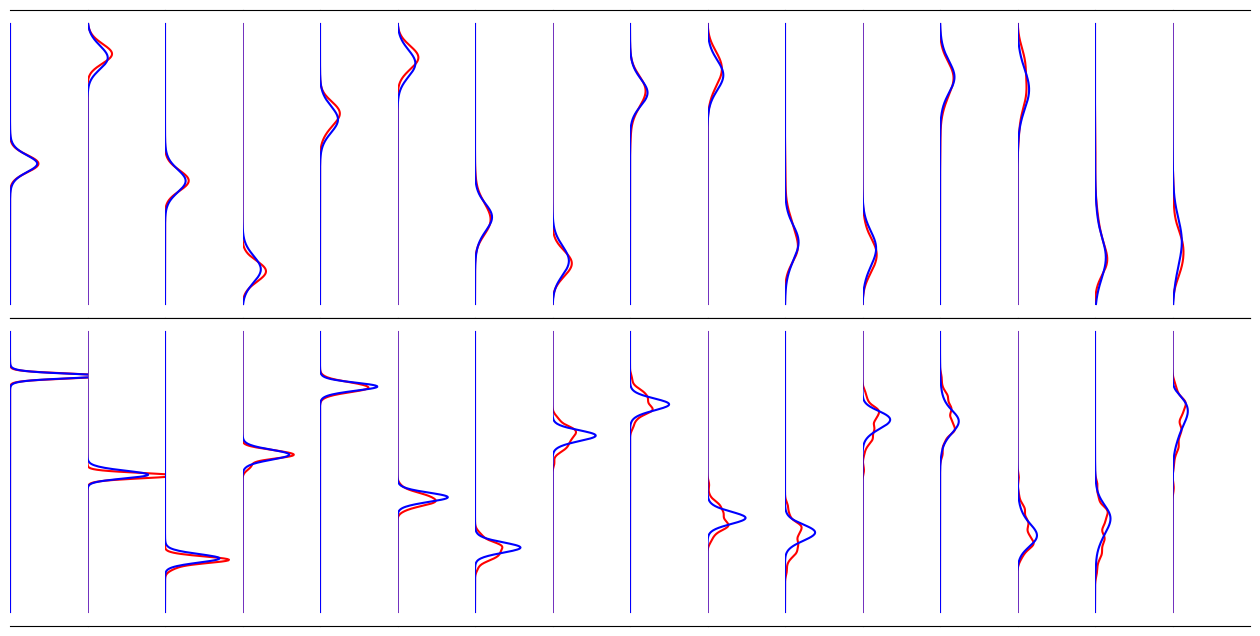

In [17]:
normpdf = lambda x, mu, sgm: jnp.exp( - 0.5*((x-mu)/sgm)**2) / (sgm*jnp.sqrt(2*jnp.pi))

fontsize = 18

n = pred_rX[0].shape[-1]
times = jnp.concatenate([jnp.arange(0, pred_rX[0].shape[1], 20), jnp.array([-1]).reshape(1,)])
plt.close('all')
plt.rcParams['font.size'] = fontsize
fig, ax = plt.subplots(n,len(times), figsize=(len(times)*1, n*4), gridspec_kw = {'wspace':0, 'hspace':0})

ntheta=10
x = jnp.arange(-2.2,2.2,0.01)
for i in range(n):
    for nt, t in enumerate(times):

        pdfs = jax.vmap(normpdf, in_axes=(None,0,0))(x, pred_rX[0][:,t,i], pred_rX[1][:,t,i])
        y = jnp.mean(pdfs, axis=0)
        ax[i,nt].plot(y,x, 'r')

        pdfs = jax.vmap(normpdf, in_axes=(None,0,0))(x, HMC_pred[0][:,t,i], HMC_pred[1][:,t,i])
        y = jnp.mean(pdfs, axis=0)
        ax[i,nt].plot(y,x, 'b')

for i in range(n):
    for j in range(len(times)):
        ax[i,j].tick_params(bottom = False, left = False)
        ax[i,j].axes.xaxis.set_ticklabels([])
        ax[i,j].axes.yaxis.set_ticklabels([])
        ax[i,j].spines[['left','right']].set_visible(False)
        ax[i,j].set_xlim([0,8])


In [25]:
HOME = os.getcwd()
case = '_H'
ext_name='_train'

train_var=[0,1]
DNN_fu_list = [1,0]

prob_name = 'Hamiltonian'  ## option: Linear, VolterraLodka, Hamiltonian, Linhard, Rossler, Lorentz
case_no   =  0
Heteroscedastic = 0


dir = prob_name+'_C'+str(case_no)+'_D'+str(train_var)+'_N'+str(DNN_fu_list)
dir += '_heto' if Heteroscedastic else '_homo'
print('case = '+dir)
path = os.path.join(HOME, "output/ODE/"+dir)

PostPross_Data_0 = PyTree.load(path+'/checkpoints', name='PostPross_Data_test_0_12')
PostPross_Data_3 = PyTree.load(path+'/checkpoints', name='PostPross_Data_test_0_13')
PostPross_Data_5 = PyTree.load(path+'/checkpoints', name='PostPross_Data_test_0_15')
PostPross_Data_6 = PyTree.load(path+'/checkpoints', name='PostPross_Data_test_0_17')
PostPross_Data_8 = PyTree.load(path+'/checkpoints', name='PostPross_Data_test_0_18')
data_0 = PostPross_Data_0['cdata']
data_3 = PostPross_Data_3['cdata']
data_5 = PostPross_Data_5['cdata']
data_6 = PostPross_Data_6['cdata']
data_8 = PostPross_Data_8['cdata']

case = Hamiltonian_C0_D[0, 1]_N[1, 0]_homo
loading PostPross_Data_test_0_12 parameters
Found PostPross_Data_test_0_12 parameters
loading PostPross_Data_test_0_13 parameters
Found PostPross_Data_test_0_13 parameters
loading PostPross_Data_test_0_15 parameters
Found PostPross_Data_test_0_15 parameters
loading PostPross_Data_test_0_17 parameters
Found PostPross_Data_test_0_17 parameters
loading PostPross_Data_test_0_18 parameters
Found PostPross_Data_test_0_18 parameters


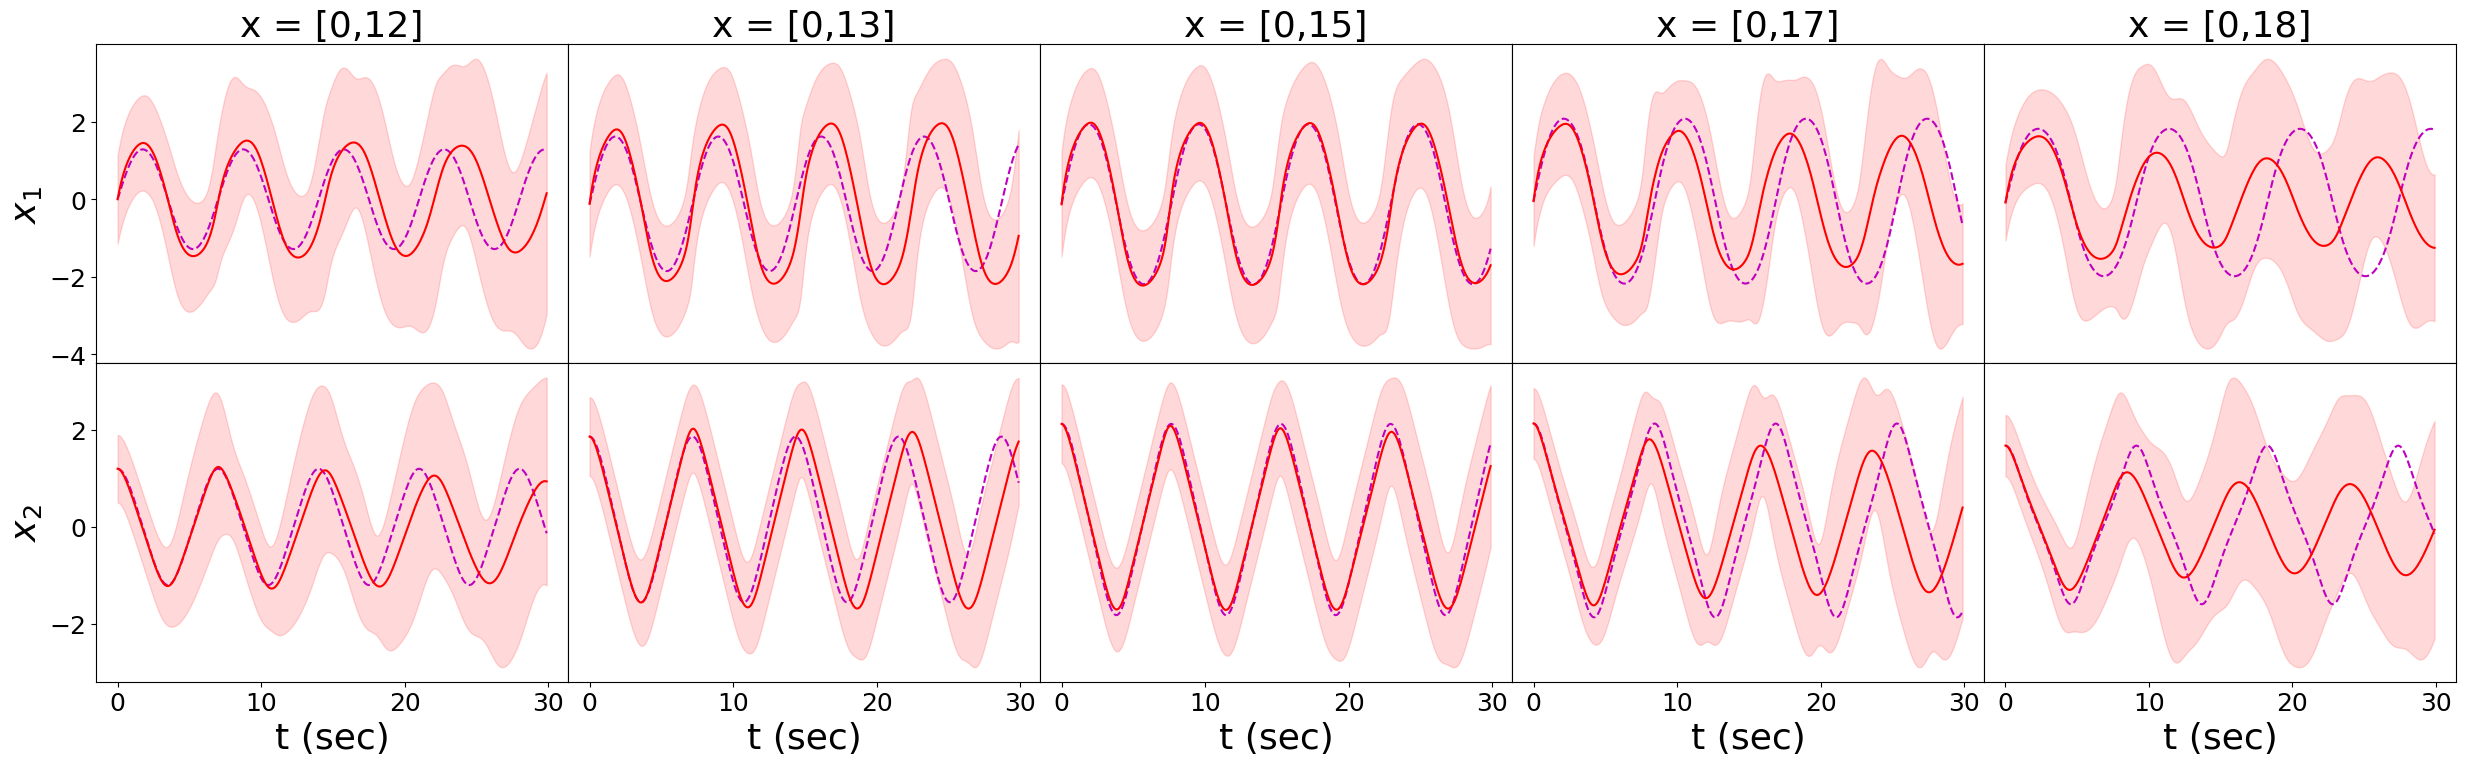

In [26]:
std_ord = 3
clr = 'r'
alpha = 0.15

t_arr = data_0['t_arr'], data_3['t_arr'], data_5['t_arr'], data_6['t_arr'], data_8['t_arr']
data_train = data_0['data_train'], data_3['data_train'], data_5['data_train'], data_6['data_train'], data_8['data_train']
data_test = data_0['data_test'], data_3['data_test'], data_5['data_test'], data_6['data_test'], data_8['data_test']
train_idx = data_0['train_idx'], data_3['train_idx'], data_5['train_idx'], data_6['train_idx'], data_8['train_idx']
pred_rX = PostPross_Data_0['pred_rX'], PostPross_Data_3['pred_rX'], PostPross_Data_5['pred_rX'], PostPross_Data_6['pred_rX'], PostPross_Data_8['pred_rX']

plt.close('all')
fontsize = 18
plt.rcParams['font.size'] = fontsize
fig, ax = plt.subplots(2,5, figsize=(5*5, 2*4), gridspec_kw = {'wspace':0, 'hspace':0})

for j in range(5):

    X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX[j])
    for i in range(2):
        ax[i,j].plot(t_arr[j], data_test[j][:,i], '--m')
        ax[i,j].plot(t_arr[j], X_mean[:,i,], clr)
        ax[i,j].fill_between(t_arr[j], (X_mean[:,i]-std_ord*sX_tot[:,i]), (X_mean[:,i]+std_ord*sX_tot[:,i]), color=clr, alpha=alpha)

for j in range(5):
    ax[1,j].set_xlabel('t (sec)', size=26)
    ax[0,j].axes.xaxis.set_ticklabels([])
for j in range(2):
    for k in [1,2,3,4]:
        ax[j,k].axes.yaxis.set_ticklabels([])
        ax[j,k].tick_params(left = False)
    # ax[j,0].set_ylabel('v'+str(var))

ax[0,0].set_title('x = [0,12]', size=26)
ax[0,1].set_title('x = [0,13]', size=26)
ax[0,2].set_title('x = [0,15]', size=26)
ax[0,3].set_title('x = [0,17]', size=26)
ax[0,4].set_title('x = [0,18]', size=26)
ax[0,0].set_ylabel(r'$x_1$', size=26)
ax[1,0].set_ylabel(r'$x_2$', size=26)

fig.tight_layout()
# plt.savefig(path+'/plots/test'+case+ext_name, dpi=300)
plt.savefig(path+'/plots/pred_C0_Ham_test', dpi=300)